<a href="https://colab.research.google.com/github/zafe312/public_zafe/blob/master/ML_eduonix/Stock%20market%20clustering/Stock_market_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import sys, numpy, matplotlib, pandas

print(sys.version)
print(numpy.__version__)
print(matplotlib.__version__)
print(pandas.__version__)

3.6.9 (default, Apr 18 2020, 01:56:04) 
[GCC 8.4.0]
1.18.5
3.2.2
1.0.5


In [2]:
from pandas_datareader import data
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import datetime

/usr/local/lib/python3.6/dist-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [3]:
# Define the instruments to download. We would like to see Apple, Microsoft and others.
companies_dict = {
'Amazon': 'AMZN',
'Apple': 'AAPL',
'Walgreen': 'WBA',
'Northrop Grumman': 'NOC',
'Boeing': 'BA',
'Lockheed Martin': 'LMT',
'McDonalds': 'MCD',
'Intel': 'INTC',
'Navistar': 'NAV',  
'IBM': 'IBM',
'Texas Instruments': 'TXN',
'MasterCard': 'MA',
'Microsoft': 'MSFT',
'General Electrics': 'GE',
# 'Symantec': 'SYMC', not available online
'American Express': 'AXP',
'Pepsi': 'PEP',
'Coca Cola': 'KO',
'Johnson & Johnson': 'JNJ',
'Toyota': 'TM',
'Honda': 'HMC',
'Mitsubishi': 'MSBHY',
'Sony': 'SNE',
'Exxon': 'XOM',
'Chevron': 'CVX',
'Valero Energy': 'VLO',
'Ford': 'F',
'Bank of America': 'BAC'}

companies = sorted(companies_dict.items(), key=lambda x: x[1])

In [4]:
print(companies)

[('Apple', 'AAPL'), ('Amazon', 'AMZN'), ('American Express', 'AXP'), ('Boeing', 'BA'), ('Bank of America', 'BAC'), ('Chevron', 'CVX'), ('Ford', 'F'), ('General Electrics', 'GE'), ('Honda', 'HMC'), ('IBM', 'IBM'), ('Intel', 'INTC'), ('Johnson & Johnson', 'JNJ'), ('Coca Cola', 'KO'), ('Lockheed Martin', 'LMT'), ('MasterCard', 'MA'), ('McDonalds', 'MCD'), ('Mitsubishi', 'MSBHY'), ('Microsoft', 'MSFT'), ('Navistar', 'NAV'), ('Northrop Grumman', 'NOC'), ('Pepsi', 'PEP'), ('Sony', 'SNE'), ('Toyota', 'TM'), ('Texas Instruments', 'TXN'), ('Valero Energy', 'VLO'), ('Walgreen', 'WBA'), ('Exxon', 'XOM')]


In [5]:
# Define which online source to use
data_source = 'yahoo'

# Define start and end date
start_date = '2015-01-01'
end_date = '2017-12-31'

In [6]:
# User pandas_reader.data.DataReader to load the desired data. As simple as that.
panel_data = data.DataReader(list(companies_dict.values()), data_source, start_date, end_date)

In [7]:
# Print axes label
print(panel_data[:5])
print(panel_data.axes)

Attributes   Adj Close              ...      Volume             
Symbols           AMZN        AAPL  ...           F          BAC
Date                                ...                         
2015-01-02  308.519989   99.945885  ...  24777900.0   48951100.0
2015-01-05  302.190002   97.130241  ...  44079700.0  105605500.0
2015-01-06  295.290009   97.139420  ...  32981600.0  144912400.0
2015-01-07  298.420013   98.501518  ...  26065300.0  104603800.0
2015-01-08  300.459991  102.286186  ...  33943400.0   73388500.0

[5 rows x 162 columns]
[DatetimeIndex(['2015-01-02', '2015-01-05', '2015-01-06', '2015-01-07',
               '2015-01-08', '2015-01-09', '2015-01-12', '2015-01-13',
               '2015-01-14', '2015-01-15',
               ...
               '2017-12-15', '2017-12-18', '2017-12-19', '2017-12-20',
               '2017-12-21', '2017-12-22', '2017-12-26', '2017-12-27',
               '2017-12-28', '2017-12-29'],
              dtype='datetime64[ns]', name='Date', length=755, fr

In [8]:
# Find stock open and stock close data values
stock_close = panel_data['Close']
stock_open = panel_data['Open']

print(stock_close[:5])
print(stock_close.iloc[0])

Symbols           AMZN        AAPL        WBA  ...        VLO      F        BAC
Date                                           ...                             
2015-01-02  308.519989  109.330002  76.000000  ...  50.340000  15.36  17.900000
2015-01-05  302.190002  106.250000  74.500000  ...  48.270000  14.76  17.379999
2015-01-06  295.290009  106.260002  74.690002  ...  47.680000  14.62  16.860001
2015-01-07  298.420013  107.750000  76.599998  ...  47.310001  15.04  16.940001
2015-01-08  300.459991  111.889999  77.550003  ...  50.020000  15.42  17.290001

[5 rows x 27 columns]
Symbols
AMZN     308.519989
AAPL     109.330002
WBA       76.000000
NOC      146.460007
BA       129.949997
LMT      193.309998
MCD       93.260002
INTC      36.360001
NAV       34.160000
IBM      162.059998
TXN       53.480000
MA        85.680000
MSFT      46.759998
GE        24.096153
AXP       93.019997
PEP       94.440002
KO        42.139999
JNJ      104.519997
TM       125.669998
HMC       29.590000
MSBHY    

In [9]:
print(panel_data.shape)
print(stock_close.shape)

(755, 162)
(755, 27)


In [10]:
6*27 # 6 columns of info for 27 companies

162

In [11]:
# Calculating daily stock movement
stock_close = np.array(stock_close).T
stock_open = np.array(stock_open).T

row, col = stock_close.shape

print(row, col)

27 755


In [13]:
movements = np.zeros([row, col])
for i in range(0, row):
    movements[i,:] = np.subtract(stock_close[i,:], stock_open[i,:])

for i in range(0, len(companies)):
   print('Company: {}, Change: {}'.format(companies[i][0], sum(movements[i][:])))
    
print(movements.shape)

Company: Apple, Change: -82.730224609375
Company: Amazon, Change: 16.689895629882812
Company: American Express, Change: -5.6500701904296875
Company: Boeing, Change: 75.39007568359375
Company: Bank of America, Change: 102.7198486328125
Company: Chevron, Change: 60.23992919921875
Company: Ford, Change: 51.34001922607422
Company: General Electrics, Change: 19.86003303527832
Company: Honda, Change: -0.2399907112121582
Company: IBM, Change: 15.639968872070312
Company: Intel, Change: 29.139911651611328
Company: Johnson & Johnson, Change: 24.589866638183594
Company: Coca Cola, Change: 28.760025024414062
Company: Lockheed Martin, Change: 4.653881072998047
Company: MasterCard, Change: 7.210105895996094
Company: McDonalds, Change: 38.079978942871094
Company: Mitsubishi, Change: 12.15997314453125
Company: Microsoft, Change: 31.659950256347656
Company: Navistar, Change: -17.310104370117188
Company: Northrop Grumman, Change: -8.060001373291016
Company: Pepsi, Change: 30.540021896362305
Company: Son

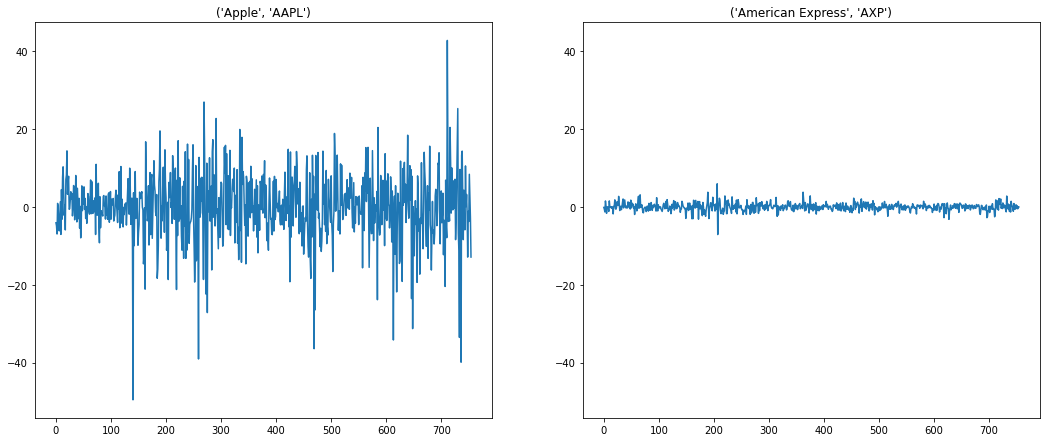

In [17]:
# Visualization - plot stock movement
plt.clf
plt.figure(figsize=(18,16))
ax1 = plt.subplot(221)
plt.plot(movements[0][:])
plt.title(companies[0])

plt.subplot(222, sharey=ax1)
plt.plot(movements[2][:])
plt.title(companies[2])
plt.show()

In [18]:
# Import Normalizer
from sklearn.preprocessing import Normalizer
from sklearn.pipeline import make_pipeline
from sklearn.cluster import KMeans

# Create a normalizer: normalizer
normalizer = Normalizer()
new = normalizer.fit_transform(movements)

print(new.max())
print(new.min())
print(new.mean())

0.2604577827945872
-0.25991072682969973
0.0010453709828151102


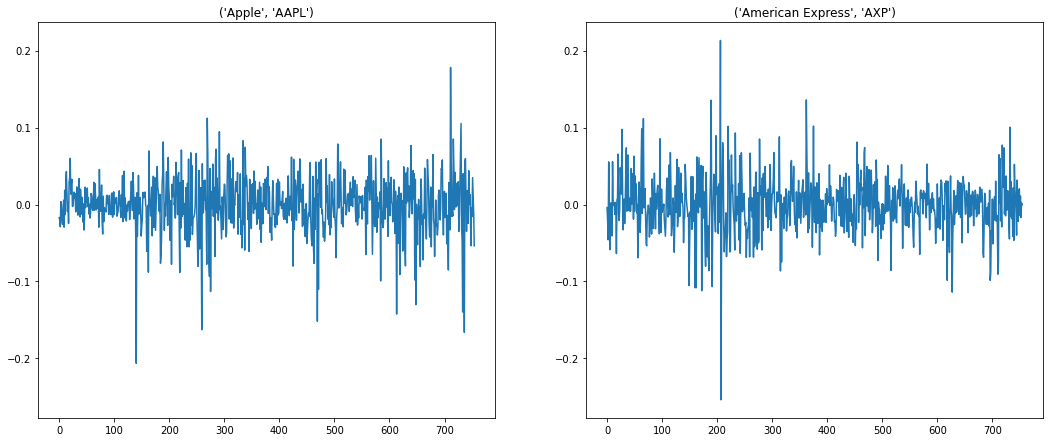

In [19]:
# Visualization - plot stock movement
plt.clf
plt.figure(figsize=(18,16))
ax1 = plt.subplot(221)
plt.plot(new[0][:])
plt.title(companies[0])

plt.subplot(222, sharey=ax1)
plt.plot(new[2][:])
plt.title(companies[2])
plt.show()

In [37]:
# Normalizer for use in pipeline
normalizer = Normalizer()

# Create a KMeans model with 10 clusters: kmeans
kmeans = KMeans(n_clusters=10, max_iter=1000)

# Make a pipeline chaining normalizer and kmeans: pipeline
pipeline = make_pipeline(normalizer, kmeans)

# Fit pipeline to the daily price movements
pipeline.fit(movements)

print(kmeans.inertia_)

9.091818233933044


In [38]:
# Import pandas
import pandas as pd

# Predict the cluster labels: labels
labels = pipeline.predict(movements)

# Create a DataFrame aligning labels and companies: df
df = pd.DataFrame({'labels': labels, 'companies': companies})

# Display df sorted by cluster label
print(df.sort_values('labels'))

    labels                 companies
26       0              (Exxon, XOM)
14       0          (MasterCard, MA)
19       1   (Northrop Grumman, NOC)
18       1           (Navistar, NAV)
25       1           (Walgreen, WBA)
8        1              (Honda, HMC)
13       1    (Lockheed Martin, LMT)
7        2   (General Electrics, GE)
1        2            (Amazon, AMZN)
9        2                (IBM, IBM)
10       2             (Intel, INTC)
15       3          (McDonalds, MCD)
16       3       (Mitsubishi, MSBHY)
4        4    (Bank of America, BAC)
3        4              (Boeing, BA)
17       4         (Microsoft, MSFT)
5        4            (Chevron, CVX)
20       5              (Pepsi, PEP)
21       5               (Sony, SNE)
22       6              (Toyota, TM)
23       6  (Texas Instruments, TXN)
2        7   (American Express, AXP)
11       8  (Johnson & Johnson, JNJ)
6        8                 (Ford, F)
12       8           (Coca Cola, KO)
0        8             (Apple, AAPL)
2

In [39]:
from sklearn.decomposition import PCA

# Visualize the results on PCA-reduced data
# Principal component analysis (PCA)
# Linear dimensionality reduction using Singular Value Decomposition of the data to project it to a lower dimensional space

reduced_data = PCA(n_components=2).fit_transform(new)
kmeans = KMeans(init='k-means++', n_clusters=10, n_init=10)
kmeans.fit(reduced_data)
labels = kmeans.predict(reduced_data)

# Create a DataFrame aligning labels and companies: df
df = pd.DataFrame({'labels': labels, 'companies': companies})

# Display df sorted by cluster label
print(df.sort_values('labels'))

    labels                 companies
2        0   (American Express, AXP)
4        0    (Bank of America, BAC)
0        1             (Apple, AAPL)
1        1            (Amazon, AMZN)
12       1           (Coca Cola, KO)
10       1             (Intel, INTC)
11       1  (Johnson & Johnson, JNJ)
14       2          (MasterCard, MA)
24       2      (Valero Energy, VLO)
18       2           (Navistar, NAV)
19       2   (Northrop Grumman, NOC)
15       3          (McDonalds, MCD)
17       3         (Microsoft, MSFT)
5        3            (Chevron, CVX)
3        3              (Boeing, BA)
16       3       (Mitsubishi, MSBHY)
23       4  (Texas Instruments, TXN)
22       4              (Toyota, TM)
26       5              (Exxon, XOM)
8        5              (Honda, HMC)
25       5           (Walgreen, WBA)
6        6                 (Ford, F)
21       7               (Sony, SNE)
7        7   (General Electrics, GE)
13       8    (Lockheed Martin, LMT)
9        9                (IBM, IBM)
2

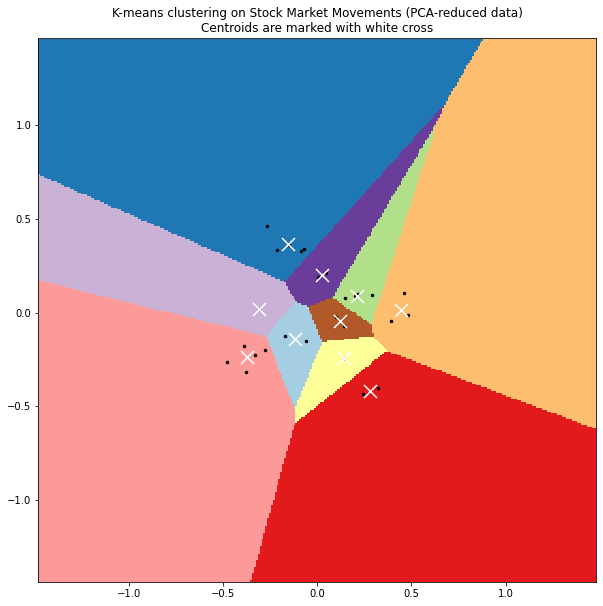

In [40]:
# Step size of the mesh. Decrease to increase the quality of the VQ.
h = .01     # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)

# Put the result into a color plot
Z = Z.reshape(xx.shape)

# Define Colormap
cmap = plt.cm.Paired

plt.figure(figsize=(10, 10))
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=cmap,
           aspect='auto', origin='lower')

plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=5)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.title('K-means clustering on Stock Market Movements (PCA-reduced data)\n'
          'Centroids are marked with white cross')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.show()